In [1]:
%load_ext autoreload

%autoreload 2

import proplot as pplt
import numpy as np
from rolling_plot_utils import (
    plot_years_and_seasons,
    get_season,
    get_cuml_desired_obs,
    BASELINE_SURVEY_START_MJD,
    MJD_2024,
    YEAR,
)


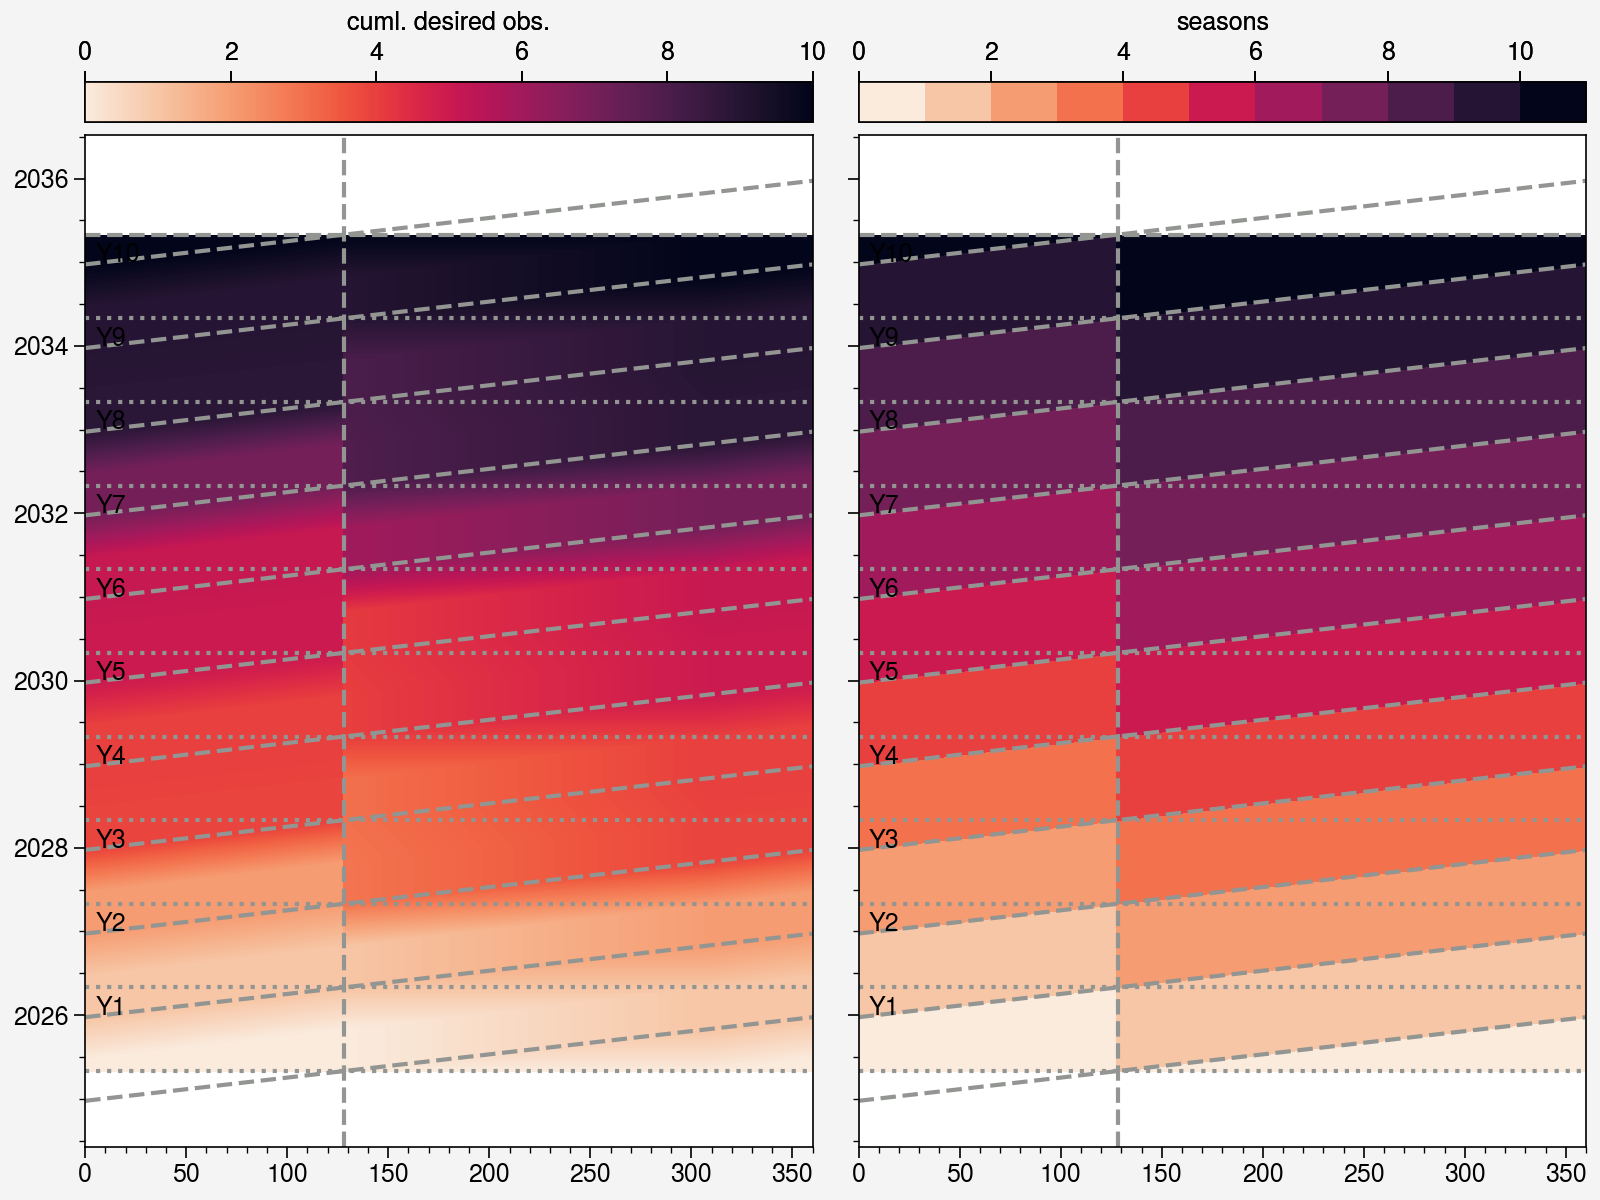

In [3]:

shift = 0
start_time = BASELINE_SURVEY_START_MJD + shift
n_years = 10

run_time = YEAR * n_years
time_grid = np.linspace(start_time, start_time + run_time, n_years * 1000 + 1)
tv = (time_grid[:-1] + time_grid[1:])/2.0
ra_grid = np.linspace(0, 360, 24*10 + 1)
rav = (ra_grid[:-1] + ra_grid[1:])/2.0    

seasons = get_season(
    tv.reshape(-1, 1), 
    rav.reshape(1, -1), 
    start_time,
)

D = 0.1
U = 2 - D
rise = np.array([1, 1, 1, U, D, 1, D, U, U, D, 1, 1, 1, 1, 1, 1])
cdobs = np.zeros((rav.shape[0], tv.shape[0])).T
for i in range(rav.shape[0]):
    cdobs[:, i] = get_cuml_desired_obs(
        tv, 
        rav[i], 
        start_time,
        rise,
    ) - get_cuml_desired_obs(
        tv * 0 + start_time, 
        rav[i], 
        start_time,
        rise,
    )


fig, axs = pplt.subplots(nrows=1, ncols=2, figsize=(8, 6))

ax = axs[0, 0]

max_cdobs = int(np.ceil(cdobs.max()))

m = ax.pcolormesh(
    ra_grid, 
    (time_grid - MJD_2024) / YEAR + 2024, 
    cdobs,
    vmin=0,
    vmax=max_cdobs,
    shading="flat",
    # N=max_obs_ints*8,
    cmap="rocket_r",
    discrete=False,
)

ax.colorbar(
    m, 
    loc="t", 
    title=f"cuml. desired obs.", 
)

plot_years_and_seasons(ax, start_time, n_years)


ax = axs[0, 1]

levels = np.linspace(0, n_years+1, (n_years+1) * 1 + 1)
values = (levels[:-1] + levels[1:])/2

m = ax.pcolormesh(
    ra_grid, (time_grid - MJD_2024) / YEAR + 2024, seasons,
    levels=levels,
    cmap="rocket_r",
)
ax.colorbar(
    m, 
    loc="t", 
    title=f"seasons", 
    ticks=levels,
)
plot_years_and_seasons(ax, start_time, n_years)